ДЗ_3
Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
df = pd.DataFrame({'wage':[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]}, columns = ['wage'])

Найдем среднее арифметическое

In [6]:
wage_mean = df['wage'].sum() / df['wage'].count()
print(wage_mean)

65.3


Определим смещенную оценку дисперсии

In [8]:
wage_variance = ((df['wage'] - df['wage'].mean())**2).sum() / df['wage'].count()
print(wage_variance)

950.11


Определим несмещенную оценку дисперсии

In [9]:
wage_variance2 = ((df['wage'] - df['wage'].mean())**2).sum() / (df['wage'].count() - 1)
print(wage_variance2)


1000.1157894736842


Построим гистограмму значений

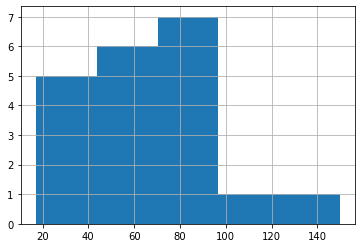

In [21]:
df['wage'].hist(bins=5)

Проверим наш расчет с помощью mean

In [15]:
df['wage'].mean()

65.3

Определим среднее квадратичное отклонение

In [18]:
wage_rms = np.sqrt(((df['wage'] - df['wage'].mean())**2).sum() / df['wage'].count())
print(wage_rms)

30.823854398825596


Проверим наш расчет

In [17]:
df['wage'].std(ddof=0)

30.823854398825596

Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

Определим первый и третий квартили

In [25]:
q1 = df['wage'].quantile(0.25)
q3 = df['wage'].quantile(0.75)

In [27]:
df['wage'].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: wage, dtype: float64

ИНтерквартильное расстояние

In [30]:
iqr = q3 - q1
print(iqr)

39.0


Построим boxplot

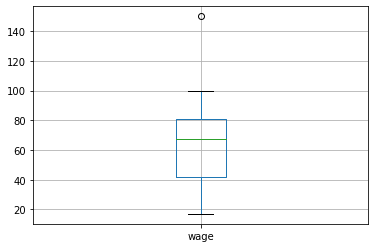

In [28]:
df[['wage']].boxplot()

Определим, сколько значений роста оказалось за пределами «усов»

In [31]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
print(boxplot_range)

(-16.5, 139.5)


In [ ]:
Количество выбросв

In [32]:
outliers = df.loc[(df['wage'] < boxplot_range[0]) | (df['wage'] > boxplot_range[1])]

outliers.shape[0]

1

In [ ]:
ДОля выбросов

In [33]:
outliers.shape[0] / df.shape[0]

0.05

Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

А = 0,8
В = 0,7
С = 0,9
Общая вероятность для всех студентов (P):
P = A + B + C
n = 1/4 *0.8 +1/4*0.7+1.2*0.9